# Test 1 - Solution inexacte sur le bord

**Idée :** Tester la correction en considérant que $u_\theta$ n'est pas exacte au bord. 

On testera comme conditions $\tilde{C}=0$ et $\tilde{C}=-u_\theta$ sur le bord.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from article.solver_fem import FEMSolver
from article.fenics_expressions import *

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


In [3]:
nb_vert = 32
solver = FEMSolver(nb_cell=nb_vert-1)

In [13]:
tab_eps_g = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.0]
tab_err_g = []
for eps in tab_eps_g:
    sol,C_tild,norme_L2 = solver.corr_add(eps=eps,change_g=True)
    tab_err_g.append(norme_L2)
    print(eps,norme_L2)

1 0.01165007170976357
0.1 0.0011650071634722904
0.01 0.00011650070884317483
0.001 1.165006338026739e-05
0.0001 1.1649988340408226e-06
1e-05 1.1649238004473268e-07
0.0 1.5281391578388536e-11


In [5]:
tab_eps = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.0]
tab_err = []
for eps in tab_eps:
    sol,C_tild,norme_L2 = solver.corr_add(eps=eps)
    tab_err.append(norme_L2)
    print(eps,norme_L2)

1 0.856961077787801
0.1 0.08569610777864657
0.01 0.008569610777731173
0.001 0.0008569610776396311
0.0001 8.569610763047913e-05
1e-05 8.569610629575835e-06
0.0 1.528145966117635e-11


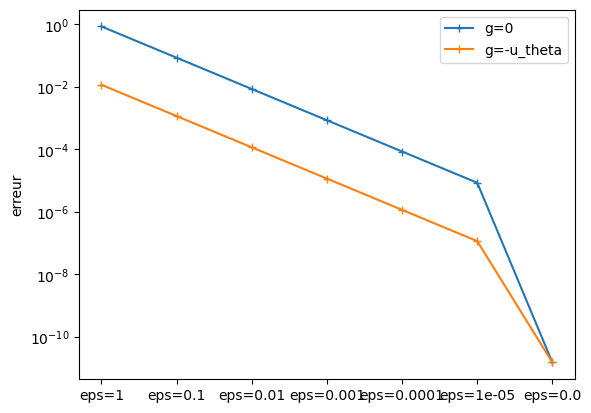

In [14]:
plt.figure()
plt.semilogy(tab_err,"+-",label='g=0')
plt.semilogy(tab_err_g,"+-",label='g=-u_theta')
plt.xticks(ticks=np.arange(0,len(tab_eps),1),labels=np.array([f"eps={eps}" for eps in tab_eps]),fontsize=10)
# plt.xlabel('eps')
plt.ylabel('erreur')
plt.legend()
plt.show()

In [15]:
eps = 0.1
f_expr = FExpr(degree=10, domain=solver.mesh, pb_considered=solver.pb_considered)
u_ex = UexExpr(degree=10, domain=solver.mesh, pb_considered=solver.pb_considered)
P = PExpr(degree=10, domain=solver.mesh, pb_considered=solver.pb_considered)
phi_tild = u_ex + eps * P

Object cannot be plotted directly, projecting to piecewise linears.


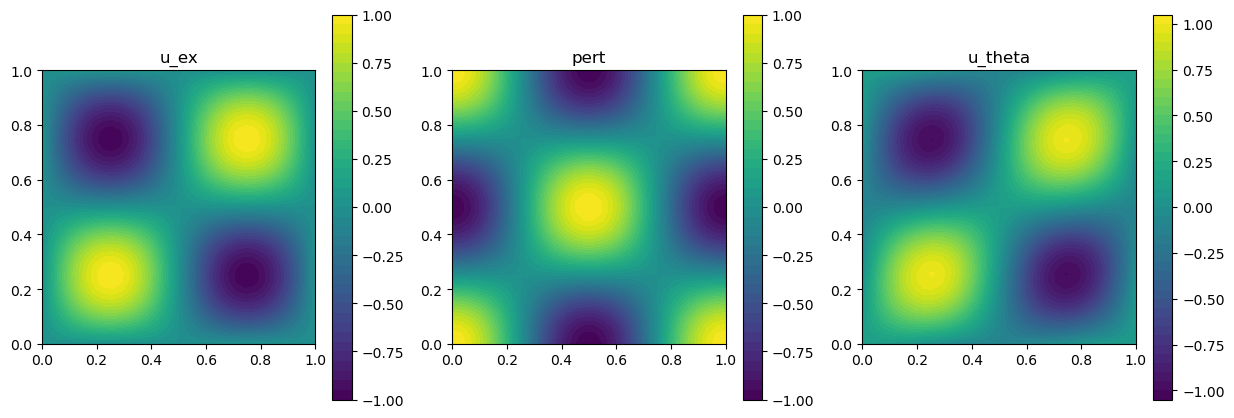

In [16]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
u_ex_inter = interpolate(u_ex, solver.V)
c = plot(u_ex_inter, title="u_ex")
plt.colorbar(c)

plt.subplot(1,3,2)
P_inter = interpolate(P, solver.V)
c = plot(P_inter, title="pert")
plt.colorbar(c)

plt.subplot(1,3,3)
c = plot(phi_tild, title="u_theta")
plt.colorbar(c)